<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows',4000)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize,word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy.stats as stats
iopub_data_rate_limit=10000000000

<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [2]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Final_Crime_Zipcode.csv')

In [3]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

In [4]:
df_Crime_Austin_2014_to_2016.head()

,Offense_Description,Report_Date,Full Address,Zip
0,Theft: All Other Larceny,02/24/2014 12:00:00 AM,3101 GUADALUPE ST ...,78705
1,Theft: Shoplifting,08/18/2014 12:00:00 AM,1000 E 41ST ST ...,78751
2,Theft: BOV,08/22/2014 12:00:00 AM,117 W WILLIAM CANNON DR ...,78745
3,Theft: Auto Theft,07/19/2014 12:00:00 AM,6407 SPRINGDALE RD ...,78723
4,Theft: All Other Larceny,07/14/2014 12:00:00 AM,7201 BLESSING AVE ...,78752


In [5]:
df_Crime_Austin_2014_to_2016.Offense_Description.unique()

array(['Theft: All Other Larceny', 'Theft: Shoplifting', 'Theft: BOV',
       'Theft: Auto Theft', 'Aggravated Assault',
       'Burglary: Breaking & Entering', 'Theft: from Building', 'Robbery',
       'Theft: Coin Op Machine', 'Theft: Pocket Picking',
       'Theft: Auto Parts', 'Theft: Purse Snatching',
       'Homicide: Murder & Non-negligent Manslaughter', 'Theft',
       'Burglary', 'Agg Assault', 'Murder'], dtype=object)

In [6]:
m_group_Offense_Description = {'Theft: All Other Larceny'                     :'Theft',
                               'Theft: Shoplifting'                           :'Theft', 
                               'Theft: BOV'                                   :'Theft',
                               'Theft: Auto Theft'                            :'Theft',
                               'Aggravated Assault'                           :'Aggravated Assault',
                               'Burglary: Breaking & Entering'                :'Burglary', 
                               'Theft: from Building'                         :'Theft', 
                               'Robbery'                                      :'Robbery',
                               'Theft: Coin Op Machine'                       :'Theft', 
                               'Theft: Pocket Picking'                        :'Theft',
                               'Theft: Auto Parts'                            :'Theft', 
                               'Theft: Purse Snatching'                       :'Theft',
                               'Homicide: Murder & Non-negligent Manslaughter':'Homicide', 
                               'Theft'                                        :'Theft',
                               'Burglary'                                     :'Burglary', 
                               'Agg Assault'                                  :'Aggravated Assault', 
                               'Murder'                                       :'Murder'}

In [7]:
df_Crime_Austin_group_Offense_Description = df_Crime_Austin_2014_to_2016.copy()

In [8]:
df_Crime_Austin_group_Offense_Description['Offense_Description'] = df_Crime_Austin_group_Offense_Description.Offense_Description.map(m_group_Offense_Description)

In [9]:
df_Crime_Austin_group_Offense_Description.Offense_Description.unique()

array(['Theft', 'Aggravated Assault', 'Burglary', 'Robbery', 'Homicide',
       'Murder'], dtype=object)

In [10]:
#Arwen Here is the five dataframes with new categories to be graph on them cool maps.


df_Crime_Theft = df_Crime_Austin_group_Offense_Description[df_Crime_Austin_group_Offense_Description['Offense_Description'] == 'Theft']

df_Crime_Aggravated_Assault = df_Crime_Austin_group_Offense_Description[df_Crime_Austin_group_Offense_Description['Offense_Description'] == 'Aggravated Assault']

df_Crime_Burglary = df_Crime_Austin_group_Offense_Description[df_Crime_Austin_group_Offense_Description['Offense_Description'] == 'Burglary']

df_Crime_Robbery = df_Crime_Austin_group_Offense_Description[df_Crime_Austin_group_Offense_Description['Offense_Description'] == 'Robbery']

df_Crime_Homicide = df_Crime_Austin_group_Offense_Description[df_Crime_Austin_group_Offense_Description['Offense_Description'] == 'Homicide']

<h3>Upload Final__Generated_Yelp_API_Sentiment_Analysis.csv</h3>

In [11]:
df_Yelp_API = pd.read_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv')
df_Yelp_API.head()

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,96,TX,78745,https://www.yelp.com/biz/urban-mattress-south-...,$$,2017-11-15 18:16:20,I was searching for a comfortable mattress and...,29,3,0.125,0.083,0.792,0.2732,2017-08-17 21:43:53,I was helped by a Hannah at this store and she...,30,2,0.158,0.000,0.842,0.4803,2017-03-10 17:50:56,Troy was great. Very knowledgeable on mattress...,32,5,0.410,0.0,0.590,0.9360
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,124,TX,78749,https://www.yelp.com/biz/healthy-pet-austin?hr...,NaN,2017-10-19 17:27:34,Healthy Pet has a great selection of cat & dog...,31,1,0.245,0.000,0.755,0.7783,2017-09-21 16:35:13,This location is just as helpful as the Lakeli...,31,3,0.180,0.000,0.820,0.6705,2017-12-03 15:50:21,Excellent service great variety of dog toys. ...,29,2,0.382,0.0,0.618,0.9274
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,109,TX,78735,https://www.yelp.com/biz/toast-entertainment-a...,NaN,2017-11-14 10:04:52,ToastEnt was the PERFECT match for our wedding...,33,2,0.216,0.000,0.784,0.8001,2017-12-04 19:23:01,I can't even tell you how pleased we were with...,37,3,0.246,0.000,0.754,0.8583,2017-10-23 18:36:18,I was very impressed with how professional our...,33,3,0.329,0.0,0.671,0.9149
3,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,112,TX,78735,https://www.yelp.com/biz/mercedes-flowers-aust...,$$,2017-10-24 06:22:36,Update - just ordered again from Mercedes. In ...,31,3,0.233,0.000,0.767,0.7712,2017-08-08 19:01:15,"I don't even know how to begin, but I can hone...",34,2,0.372,0.000,0.628,0.9504,2017-04-01 14:42:31,Absolutely fantastic! Great storage for flower...,30,4,0.413,0.0,0.587,0.9409
4,zen-well-austin,Zen Well,5.0,reflexology,Austin,188,TX,78745,https://www.yelp.com/biz/zen-well-austin?hrid=...,NaN,2017-11-12 12:41:10,This was amazing! Dawn blew me away. She was s...,36,4,0.112,0.091,0.797,0.2003,2017-10-30 12:18:56,"Overall, a very unique massage experience!\n\n...",33,4,0.119,0.087,0.794,0.2003,2017-08-07 12:31:34,Zen Well made me more satisfied after leaving ...,34,3,0.184,0.0,0.816,0.6361


In [12]:
df_Yelp_API['First_Timestamp'] = pd.to_datetime(df_Yelp_API['First_Timestamp'])
df_Yelp_API['Second_Timestamp'] = pd.to_datetime(df_Yelp_API['Second_Timestamp'])
df_Yelp_API['Third_Timestamp'] = pd.to_datetime(df_Yelp_API['Third_Timestamp'])

In [13]:
df_Yelp_API['Zip'] = df_Yelp_API['Zip'].astype('str')

In [14]:
ordered_zips_least_to_most_crime_areas = ['78610', '78732', '78664', '78733', '78737', '78652', '78728',
       '78712', '78730', '78653', '78742', '78725', '78736', '78660',
       '78719', '78739', '78726', '78717', '78617', '78747', '78735',
       '78756', '78722', '78613', '78750', '78754', '78729', '78727',
       '78731', '78724', '78721', '78703', '78746', '78749', '78751',
       '78757', '78705', '78752', '78759', '78748', '78702', '78744',
       '78701', '78723', '78745', '78704', '78758', '78741', '78753']

In [15]:
df_Yelp_API['Zip'] = pd.Categorical(df_Yelp_API['Zip'],categories=ordered_zips_least_to_most_crime_areas,ordered=True)

In [16]:
sns.jointplot()

TypeError: jointplot() missing 2 required positional arguments: 'x' and 'y'

<h3><u>Section 1: Overall Compound Sentiment For Each Review Column</u></h3>

<h3><h3>Plot Compound Sentiment For Each Review Column</u></h3>

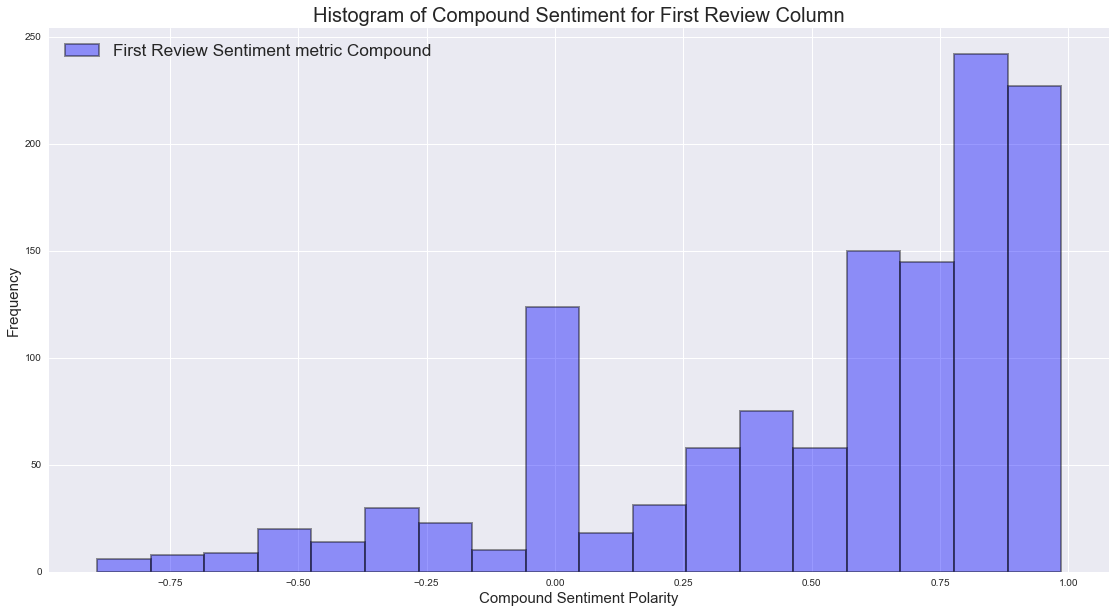

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(19,10))
sns.distplot(df_Yelp_API['First_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'First Review Sentiment metric Compound',color='b' )
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel( 'Compound Sentiment Polarity',fontsize=(15))
plt.ylabel( 'Frequency',fontsize=(15))
plt.title('Histogram of Compound Sentiment for First Review Column',fontsize=(20))
plt.legend(loc ='upper left' ,fontsize='x-large');

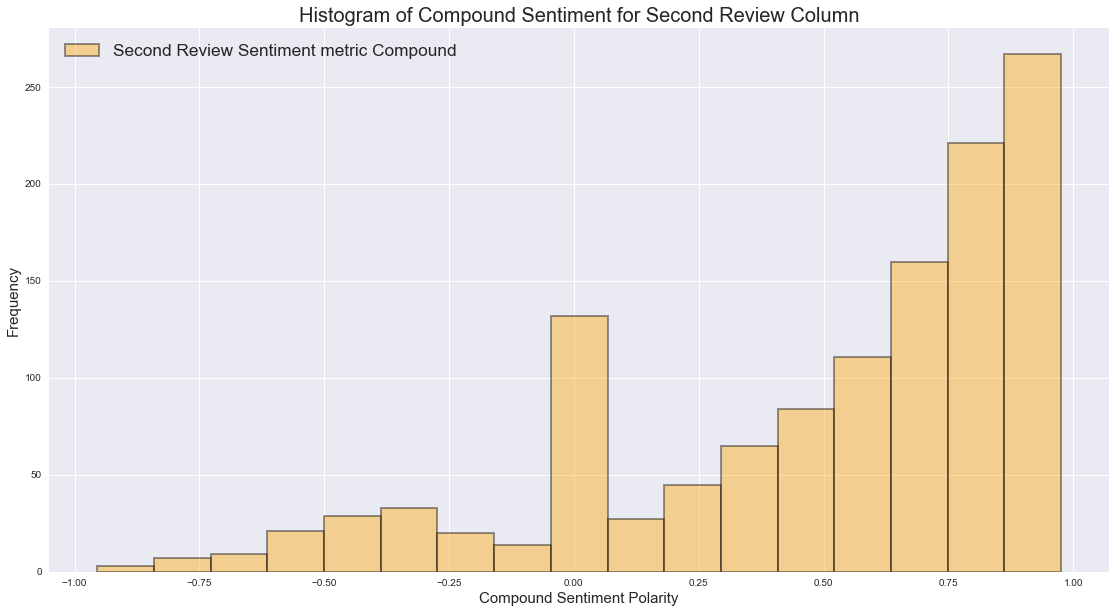

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(19,10))
sns.distplot(df_Yelp_API['Second_Review_Sentiment metric_Compound'], hist_kws=dict(edgecolor="k", linewidth=2),kde=False,label='Second Review Sentiment metric Compound',color='orange' )
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel( 'Compound Sentiment Polarity',fontsize=(15))
plt.ylabel( 'Frequency',fontsize=(15))
plt.title('Histogram of Compound Sentiment for Second Review Column',fontsize=(20))
plt.legend(loc ='upper left' ,fontsize='x-large');

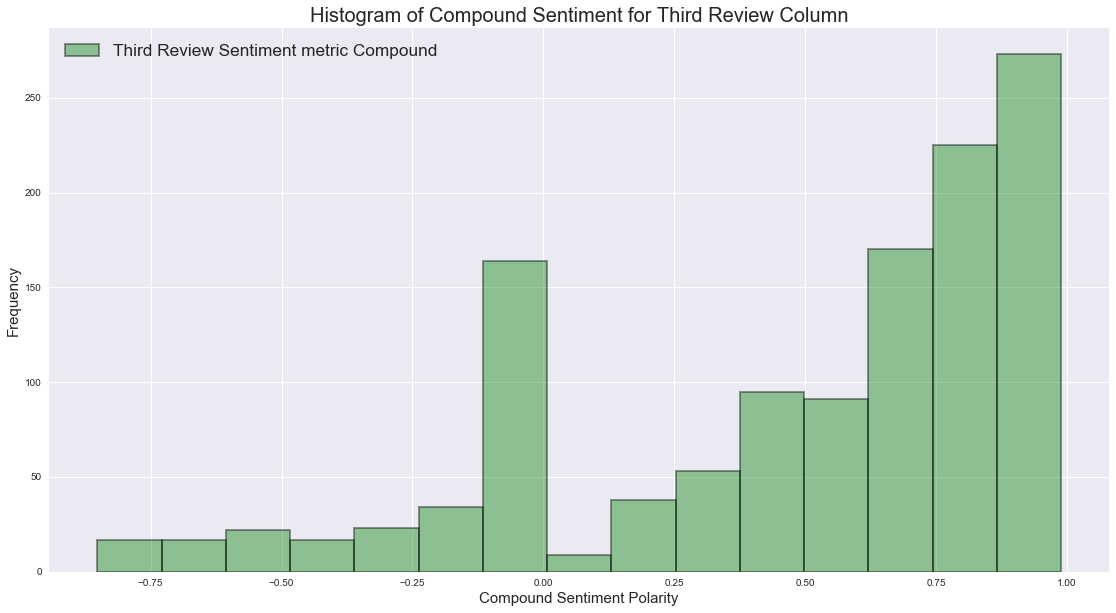

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(19,10))
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(df_Yelp_API['Third_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'Third Review Sentiment metric Compound',color='g' );
plt.xlabel( 'Compound Sentiment Polarity',fontsize=(15))
plt.ylabel( 'Frequency',fontsize=(15))
plt.title('Histogram of Compound Sentiment for Third Review Column',fontsize=(20))
plt.legend(loc ='upper left' ,fontsize='x-large');

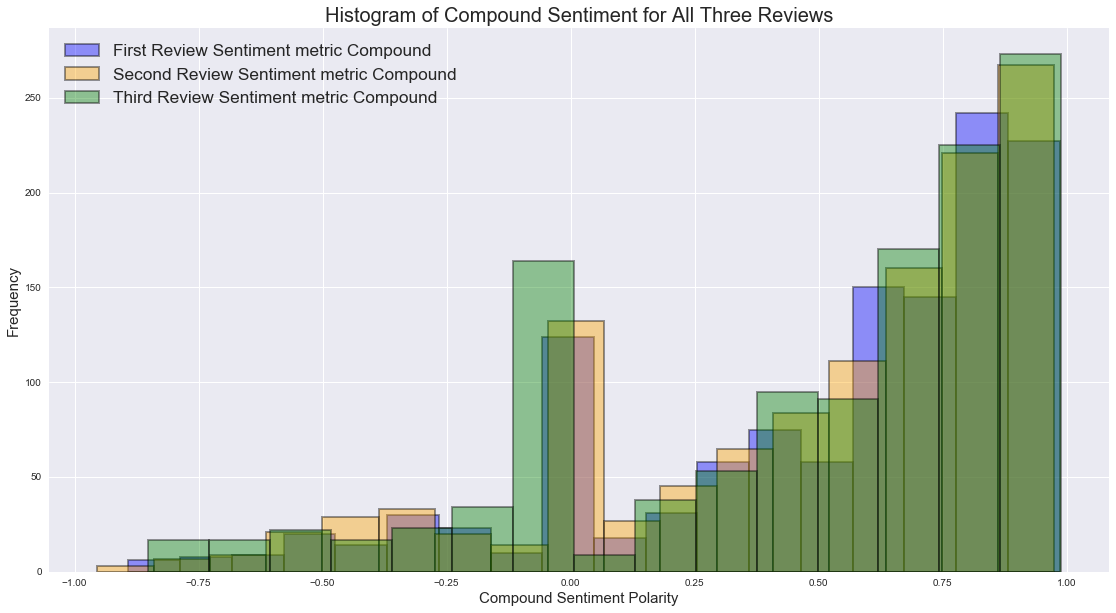

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(19,10))
sns.distplot(df_Yelp_API['First_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'First Review Sentiment metric Compound',color='b' )
sns.distplot(df_Yelp_API['Second_Review_Sentiment metric_Compound'], hist_kws=dict(edgecolor="k", linewidth=2),kde=False,label='Second Review Sentiment metric Compound',color='orange' )
sns.distplot(df_Yelp_API['Third_Review_Sentiment metric_Compound'],hist_kws=dict(edgecolor="k", linewidth=2), kde=False,label= 'Third Review Sentiment metric Compound',color='g' );
plt.rcParams["patch.force_edgecolor"] = True
plt.xlabel( 'Compound Sentiment Polarity',fontsize=(15))
plt.ylabel( 'Frequency',fontsize=(15))
plt.title('Histogram of Compound Sentiment for All Three Reviews',fontsize=(20))
plt.legend(loc ='upper left' ,fontsize='x-large');

<h3><u>Section 1: Insights</u></h3>

<ul>
<li>Indiviuals in Austin tend to have a Positive Compound Sentiment when giving bussiness reviews</li>

</ul>

<h3>Section 2: Average Compound Sentiment For Each Zip from least to Most Reported Crime Areas</h3>

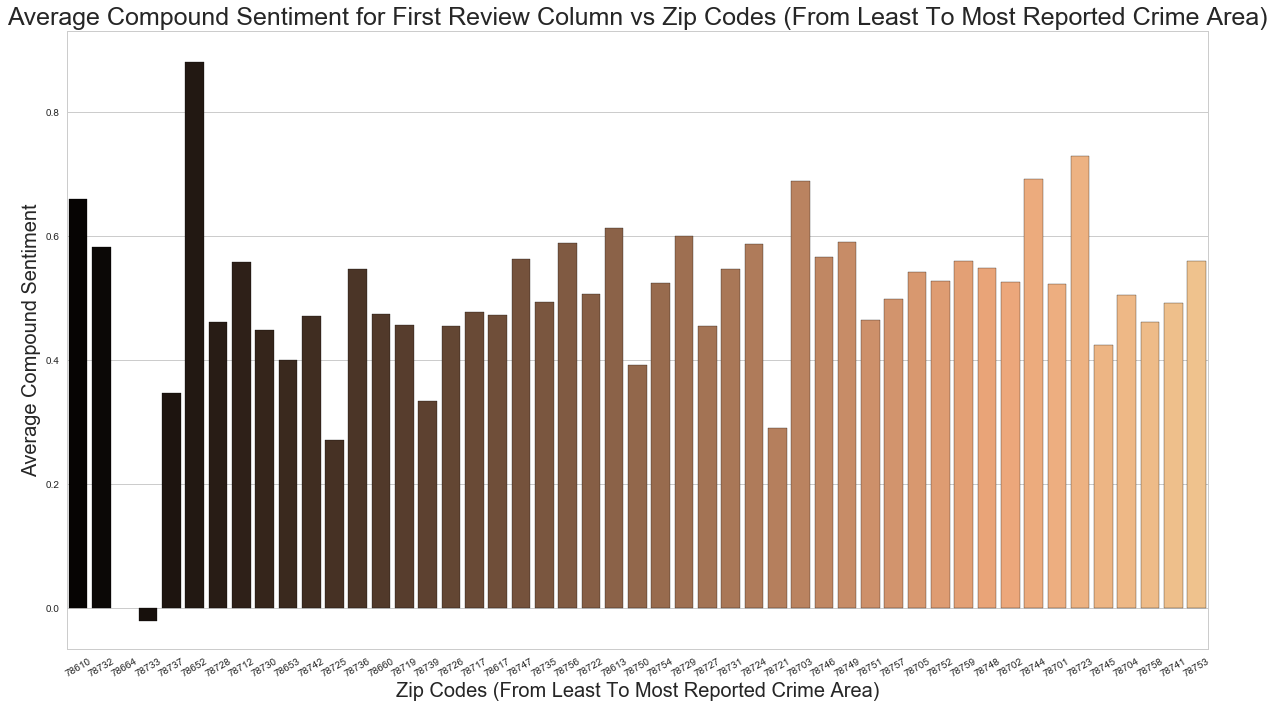

In [21]:
plt.figure(figsize=(19,10))
sns.set_style('whitegrid')
sns.barplot(x='Zip',y='First_Review_Sentiment metric_Compound',data=df_Yelp_API,ci=False,palette='copper');
plt.ylabel('Average Compound Sentiment',fontsize=(20))
plt.xlabel('Zip Codes (From Least To Most Reported Crime Area)',fontsize=(20))
plt.xticks(rotation='30')
plt.title('Average Compound Sentiment for First Review Column vs Zip Codes (From Least To Most Reported Crime Area)',fontsize=(25))

plt.tight_layout()

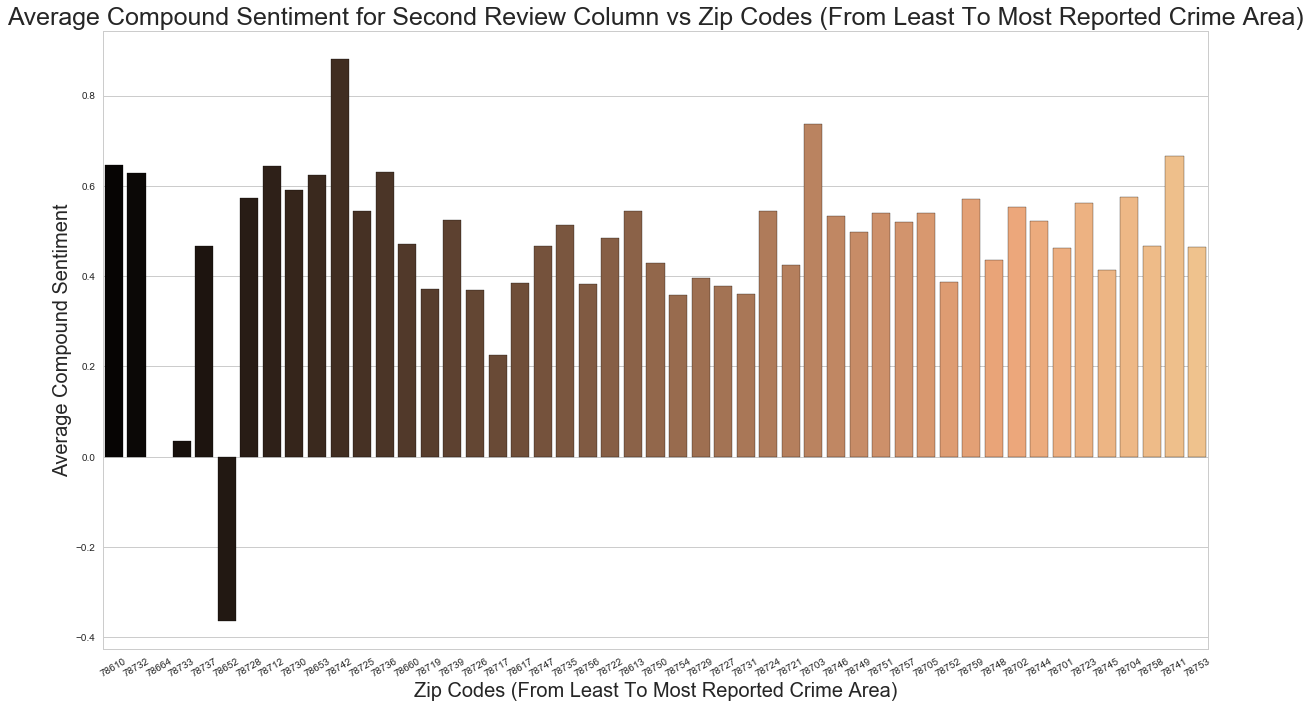

In [22]:
plt.figure(figsize=(19,10))
sns.set_style('whitegrid')
sns.barplot(x='Zip',y='Second_Review_Sentiment metric_Compound',data=df_Yelp_API,ci=False,palette='copper');
plt.ylabel('Average Compound Sentiment',fontsize=(20))
plt.xlabel('Zip Codes (From Least To Most Reported Crime Area)',fontsize=(20))
plt.xticks(rotation='30')
plt.title('Average Compound Sentiment for Second Review Column vs Zip Codes (From Least To Most Reported Crime Area)',fontsize=(25))

plt.tight_layout()

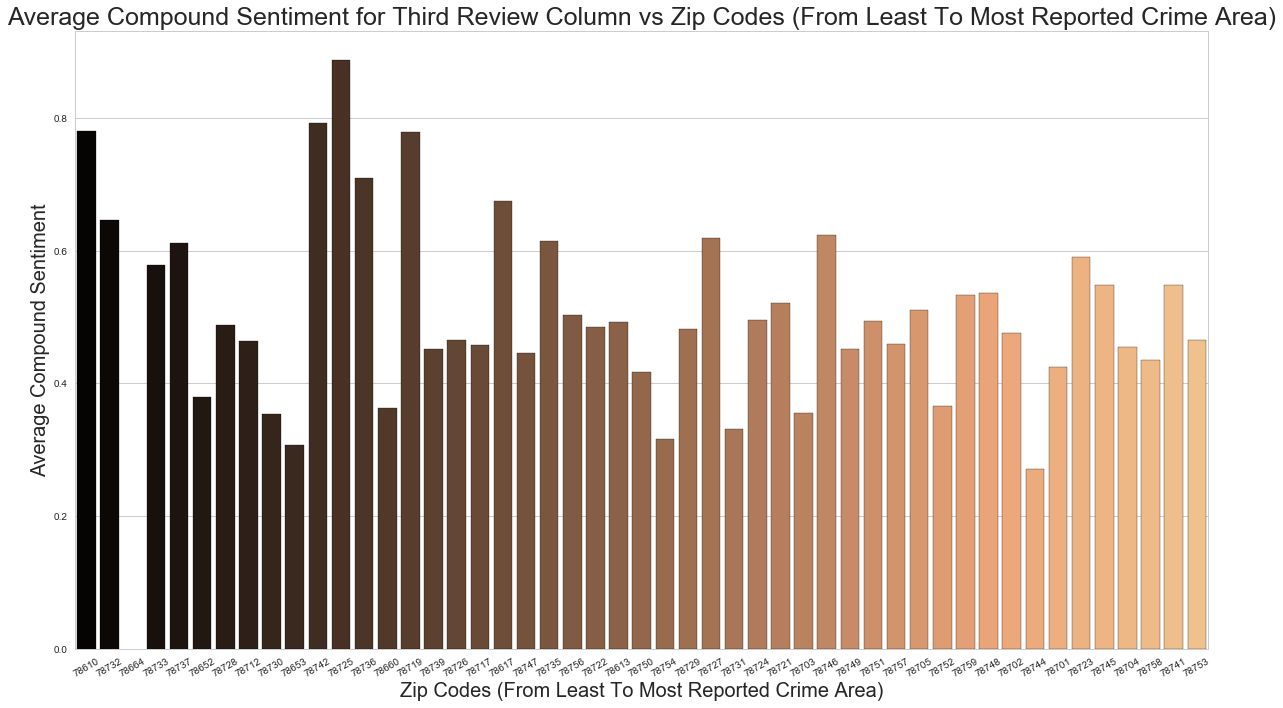

In [23]:
plt.figure(figsize=(19,10))

sns.set_style('whitegrid')
sns.barplot(x='Zip',y='Third_Review_Sentiment metric_Compound',data=df_Yelp_API,ci=False,palette='copper');
plt.ylabel('Average Compound Sentiment',fontsize=(20))
plt.xlabel('Zip Codes (From Least To Most Reported Crime Area)',fontsize=(20))
plt.xticks(rotation='30')
plt.title('Average Compound Sentiment for Third Review Column vs Zip Codes (From Least To Most Reported Crime Area)',fontsize=(25))

plt.tight_layout()

<h3><u>Section 2 insights</u> </h3>


<ul>

<li>For the first review column, there zip code in low reported crime area with a higher than normal compound sentiment rating.  </li>

<li>For the second review column the general compound sentiment has a negative compound sentiment for an area which has a low amount of reported crimes.</li>

<li>The average compound sentiment for reviews in areas with most least reported crimes tend to be higher for the  third review column</li>

</ul><br>

<p><u>The insights in section 2 could be caused by several different factors</u></p>
<ul>

<li>Are there more reviews in these areas? </li>

<li>Is a negative compound sentiment review really correlated to an lower business rating?</li>

</ul>


<h3><u>Section 3 : Average Business Ratings vs Zip Codes (From Least To Most Reported Crime Area)</u></h3>

<h3><u>Average Business Ratings vs Zip Codes (From Least To Most Reported Crime Area)</u></h3>

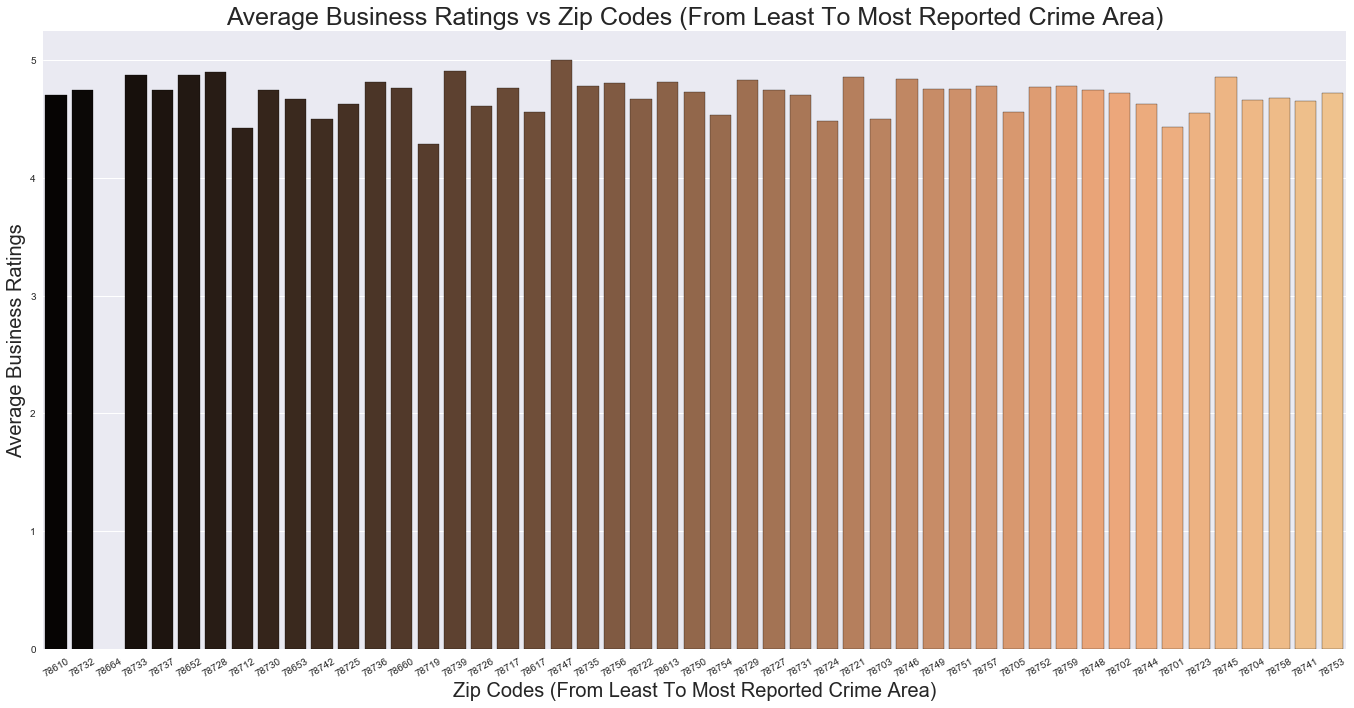

In [24]:
plt.figure(figsize=(19,10))
sns.set_style('darkgrid')
sns.barplot(x='Zip',y='Business_Ratings',data=df_Yelp_API,ci=False,palette='copper');
plt.ylabel('Average Business Ratings',fontsize=(20))
plt.xlabel('Zip Codes (From Least To Most Reported Crime Area)',fontsize=(20))
plt.xticks(rotation='30')
plt.title('Average Business Ratings vs Zip Codes (From Least To Most Reported Crime Area)',fontsize=(25))

plt.tight_layout()

<h3><u>Section 3 insights</u> </h3>


<ul>

<li>The overall Business Ratings is generally high for all areas regardless of reported crimes in the area. </li>


</ul>

<h3><u>Section 4: Overall Business Rating by Sentence Count</u></h3>

<h3>Sentence Count For Each Review Based On Business Rating</h3>

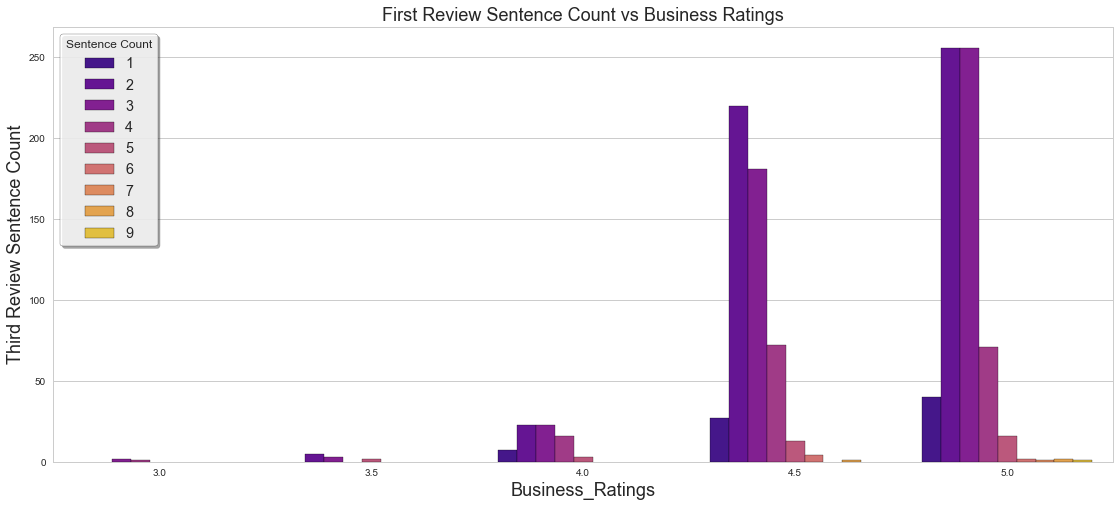

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(19,8))
plt.rcParams["patch.force_edgecolor"] = True
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['First_Review_Sentence_Count'],palette='plasma');
plt.title('First Review Sentence Count vs Business Ratings',fontsize=(18))
plt.xlabel('Business_Ratings',fontsize=(18))
plt.ylabel('Third Review Sentence Count',fontsize=(18));
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

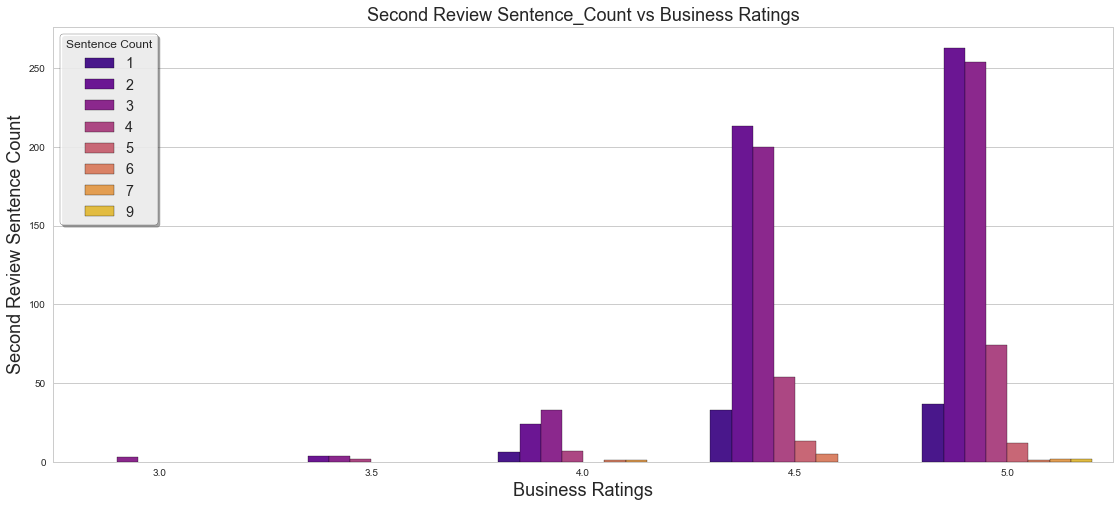

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(19,8))
plt.rcParams["patch.force_edgecolor"] = True
plt.title('Second Review Sentence_Count vs Business Ratings',fontsize=(18))
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['Second_Review_Sentence_Count'],palette='plasma');
plt.xlabel('Business Ratings',fontsize=(18))
plt.ylabel('Second Review Sentence Count',fontsize=(18));
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

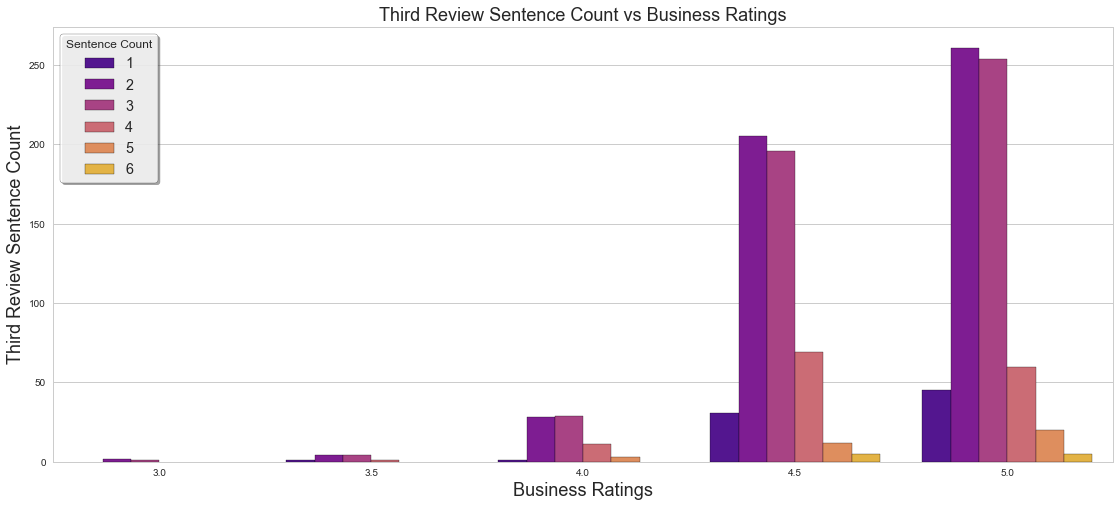

In [27]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
sns.countplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,hue=df_Yelp_API['Third_Review_Sentence_Count'],palette='plasma');
plt.title('Third Review Sentence Count vs Business Ratings',fontsize=(18))
plt.xlabel('Business Ratings',fontsize=(18))
plt.ylabel('Third Review Sentence Count',fontsize=(18))
plt.legend(frameon=True,shadow= True,edgecolor='black',fontsize = 'large', title='Sentence Count',loc=2);

<h3><u>Section 4: Insights</u></h3>

<ul>
<li>Indiviuals in Austin tend to write two to three sentences when giving a bussines review.</li>
<li>If indiviuals give a bussiness a review, it will mostly be a 4.5 or 5 rating.</li>
</ul>

<h3><u>Section 5: Overall Business Rating</u></h3>

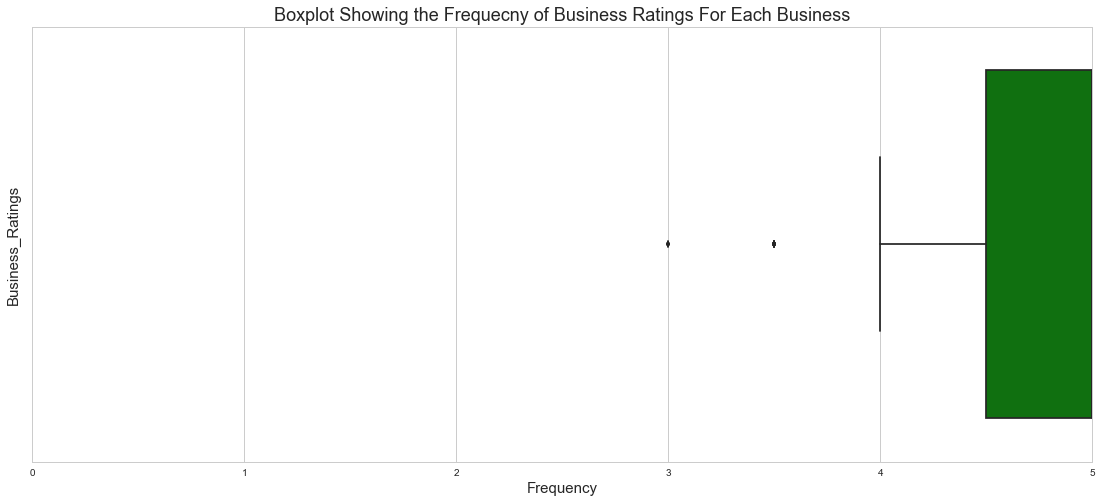

In [28]:
plt.figure(figsize=(19,8))
sns.boxplot(df_Yelp_API['Business_Ratings'],data=df_Yelp_API,color='g')
plt.xlim(0,df_Yelp_API['Review_Counts'].max())
plt.xlabel('Frequency',fontsize=(15));
plt.ylabel('Business_Ratings',fontsize=(15));
plt.xlim(0,5)
plt.title('Boxplot Showing the Frequecny of Business Ratings For Each Business',fontsize=(18));

In [29]:
df_low_Business_Ratings = df_Yelp_API[df_Yelp_API['Business_Ratings'] <=3 ]

In [30]:
df_low_Business_Ratings

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
182,stanley-steemer-austin-3,Stanley Steemer,3.0,carpet_cleaning,Austin,68,TX,78754,https://www.yelp.com/biz/stanley-steemer-austi...,NaN,2017-07-07 08:04:48,Javier & Wallace came today to clean our furni...,28,3,0.109,0.0,0.891,0.4019,2017-11-14 11:22:36,I received a quote through their online questi...,30,3,0.000,0.000,1.000,0.0000,2017-09-21 07:35:45,Really bad experience with these guys and I am...,31,2,0.126,0.215,0.659,-0.4563
1137,hoa-hoa-austin-2,Hoa-Hoa,3.0,chinese,Austin,105,TX,78705,https://www.yelp.com/biz/hoa-hoa-austin-2?hrid...,$,2017-08-31 13:52:53,I love Hoa Hoa! Back in college 2009-2014 this...,35,3,0.151,0.0,0.849,0.6988,2017-07-02 13:46:31,It's located in the Dobie Mall. The stir fried...,37,3,0.117,0.061,0.822,0.4312,2017-07-20 07:44:45,Honestly the BEST Chinese fast food near UT.\n...,29,3,0.321,0.000,0.679,0.8730
1145,el-mercado-austin-2,El Mercado,3.0,sportsbars,Austin,188,TX,78701,https://www.yelp.com/biz/el-mercado-austin-2?h...,$,2017-07-16 11:09:59,Love this place. Still family owned and operat...,31,4,0.144,0.0,0.856,0.6369,2017-06-26 20:19:42,This review is specifically for The Best Waitr...,32,3,0.216,0.000,0.784,0.7845,2017-12-03 11:05:20,1/2 order of chicken fajita nachos- perfect si...,31,2,0.209,0.000,0.791,0.7650


In [31]:
for each_item in df_low_Business_Ratings['First_Review']:
    print(' ')
    print('------')
    print(each_item)

 
------
Javier & Wallace came today to clean our furniture and carpet.  They were VERY professional, introduced themselves and knew their product.  They did a...
 
------
I love Hoa Hoa! Back in college 2009-2014 this was my go to spot for fast food Chinese food! I've returned a few times since then and it's always been...
 
------
Love this place. Still family owned and operated.  Service is always fast, chips and drinks kept filled. Adam and Angel are always so polite and best...


In [32]:
for each_item in df_low_Business_Ratings['Second_Review']:
    print(' ')
    print('------')
    print(each_item)

 
------
I received a quote through their online questionnaire. I thought is was really expensive so I called to setup and appointment for an on-site quote. When the...
 
------
It's located in the Dobie Mall. The stir fried noodles were decent but I've had better. It's not worth paying for parking at the Dobie Mall which is $5....
 
------
This review is specifically for The Best Waitress in the World, Danielle. Yes, you should specifically request to sit at one of her tables. You could not...


In [33]:
for each_item in df_low_Business_Ratings['Third_Review']:
    print(' ')
    print('------')
    print(each_item)

 
------
Really bad experience with these guys and I am really disappointed. I thought I was getting the best as they advertise so much and seem to be a larger...
 
------
Honestly the BEST Chinese fast food near UT.

Granted, their menu has a variety of genuine traditional Chinese options. They also cater to hungry UT...
 
------
1/2 order of chicken fajita nachos- perfect size for lunch, just the right amount of food so I did't get sleepy during my conference downtown. Easy to walk...


<h3><u>Overall Busineses Review Count Boxplot</u></h3>

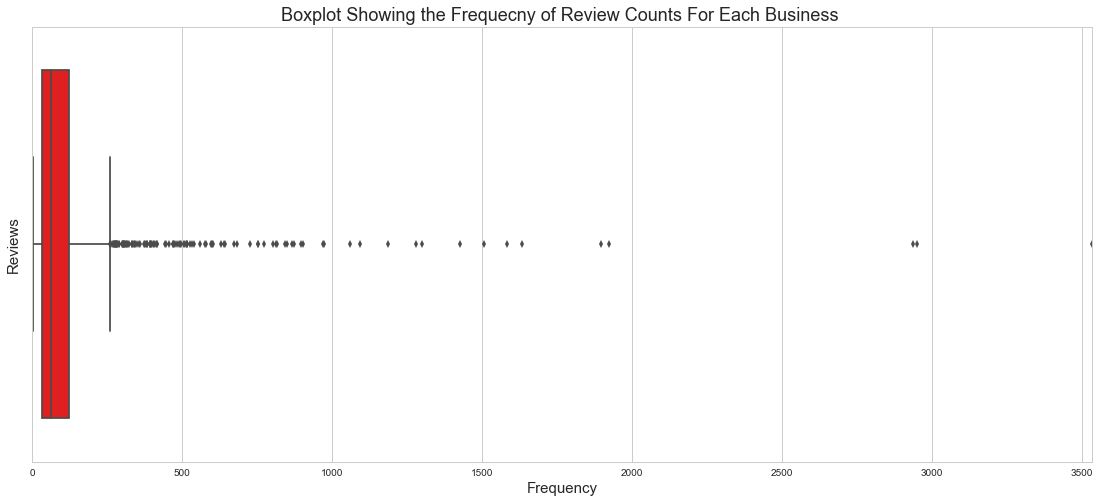

In [34]:
plt.figure(figsize=(19,8))
sns.boxplot(df_Yelp_API['Review_Counts'],data=df_Yelp_API,color='r')
plt.xlim(0,df_Yelp_API['Review_Counts'].max())
plt.xlabel( 'Frequency',fontsize=(15));
plt.ylabel( 'Reviews',fontsize=(15));
plt.title('Boxplot Showing the Frequecny of Review Counts For Each Business ',fontsize=(18));


In [35]:
df_Yelp_API.Review_Counts.mean()

125.06410256410257

<h3><u>Section 5: Insights</u></h3>

<ul>
<li>On average, businesses in Austin have around 125 reviews</li>
</ul>

In [36]:
df_Yelp_API.head(3)

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,Yelp_Url,Price,First_Timestamp,First_Review,First_Review_Word_Count,First_Review_Sentence_Count,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Timestamp,Second_Review,Second_Review_Word_Count,Second_Review_Sentence_Count,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Timestamp,Third_Review,Third_Review_Word_Count,Third_Review_Sentence_Count,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,96,TX,78745,https://www.yelp.com/biz/urban-mattress-south-...,$$,2017-11-15 18:16:20,I was searching for a comfortable mattress and...,29,3,0.125,0.083,0.792,0.2732,2017-08-17 21:43:53,I was helped by a Hannah at this store and she...,30,2,0.158,0.0,0.842,0.4803,2017-03-10 17:50:56,Troy was great. Very knowledgeable on mattress...,32,5,0.410,0.0,0.590,0.9360
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,124,TX,78749,https://www.yelp.com/biz/healthy-pet-austin?hr...,NaN,2017-10-19 17:27:34,Healthy Pet has a great selection of cat & dog...,31,1,0.245,0.000,0.755,0.7783,2017-09-21 16:35:13,This location is just as helpful as the Lakeli...,31,3,0.180,0.0,0.820,0.6705,2017-12-03 15:50:21,Excellent service great variety of dog toys. ...,29,2,0.382,0.0,0.618,0.9274
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,109,TX,78735,https://www.yelp.com/biz/toast-entertainment-a...,NaN,2017-11-14 10:04:52,ToastEnt was the PERFECT match for our wedding...,33,2,0.216,0.000,0.784,0.8001,2017-12-04 19:23:01,I can't even tell you how pleased we were with...,37,3,0.246,0.0,0.754,0.8583,2017-10-23 18:36:18,I was very impressed with how professional our...,33,3,0.329,0.0,0.671,0.9149


In [37]:
df_Yelp_API_Review_Counts =df_Yelp_API[[ 'Business_Name', 
             
              'Review_Counts',
              'Business_Ratings', 
              'Category', 
              'City',
              'Zip',  
              'Price', 
                                
             'First_Review', 
             'First_Review_Sentiment metric_Compound', 


             'Second_Review', 
             'Second_Review_Sentiment metric_Compound', 


              'Third_Review',
              'Third_Review_Sentiment metric_Compound' ]]

In [38]:
df_Yelp_API_Review_Counts.sort_values(by=['Review_Counts'],ascending=True,inplace=True)
df_Yelp_API_Review_Counts['Zip'] = df_Yelp_API_Review_Counts['Zip'].astype('str')

In [39]:
df_Top_Compaines_Compund_Sentiment = df_Yelp_API[df_Yelp_API['First_Review_Sentiment metric_Compound'] >=.8]


<h3><u>Bottom Compaines based on Compound Sentiment</u></h3>

In [47]:
df_Bottom_Compaines_Compund_Sentiment= df_Yelp_API[df_Yelp_API['First_Review_Sentiment metric_Compound'] <= -.8]
df_Bottom_Compaines_Compund_Sentiment['Zip'] = df_Bottom_Compaines_Compund_Sentiment['Zip'].astype('str')

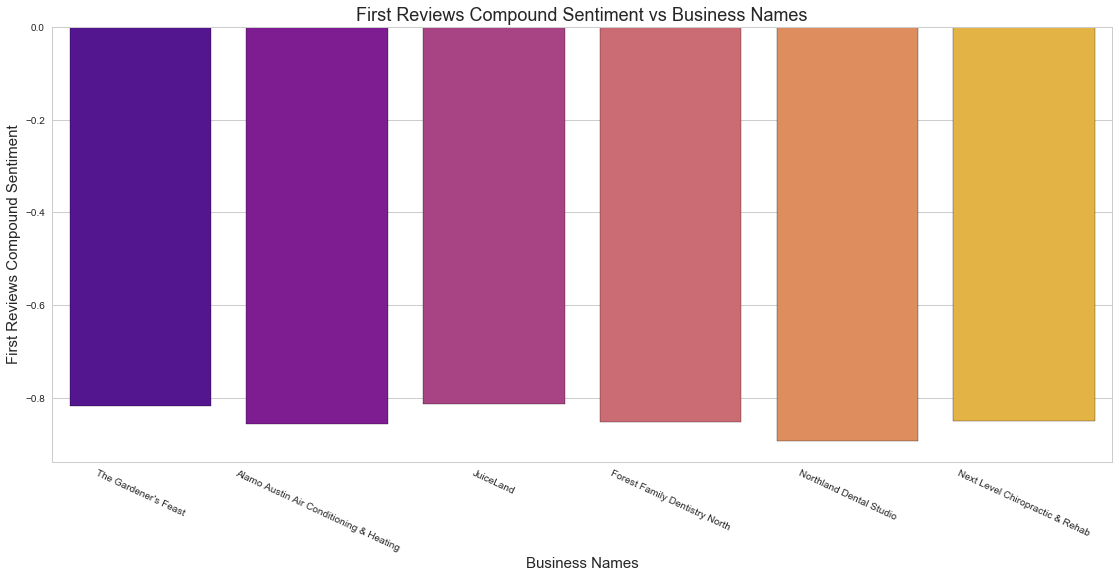

In [48]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Bottom_Compaines_Compund_Sentiment['Business_Name'],df_Bottom_Compaines_Compund_Sentiment['First_Review_Sentiment metric_Compound'],data=df_Bottom_Compaines_Compund_Sentiment,palette='plasma')
plt.xlabel('Business Names',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.ylabel('First Reviews Compound Sentiment',fontsize=(15))
plt.title('First Reviews Compound Sentiment vs Business Names',fontsize=(18))
plt.rcParams["patch.force_edgecolor"] = True
plt.xticks(rotation=-25);

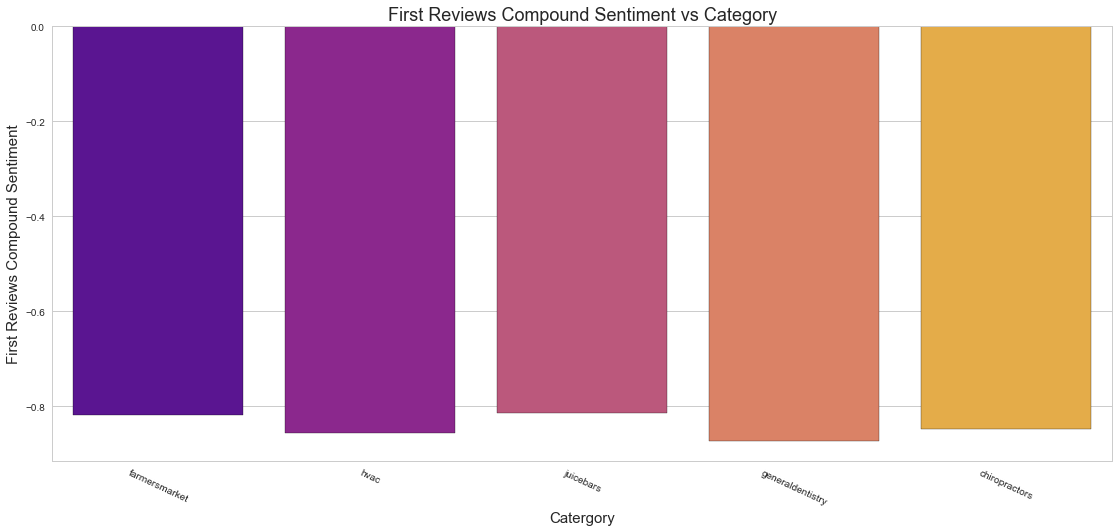

In [49]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Bottom_Compaines_Compund_Sentiment['Category'],df_Bottom_Compaines_Compund_Sentiment['First_Review_Sentiment metric_Compound'],data=df_Bottom_Compaines_Compund_Sentiment,ci=False,palette='plasma')
plt.xlabel('Catergory',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.ylabel('First Reviews Compound Sentiment',fontsize=(15))
plt.title('First Reviews Compound Sentiment vs Category',fontsize=(18))
plt.xticks(rotation=-25);

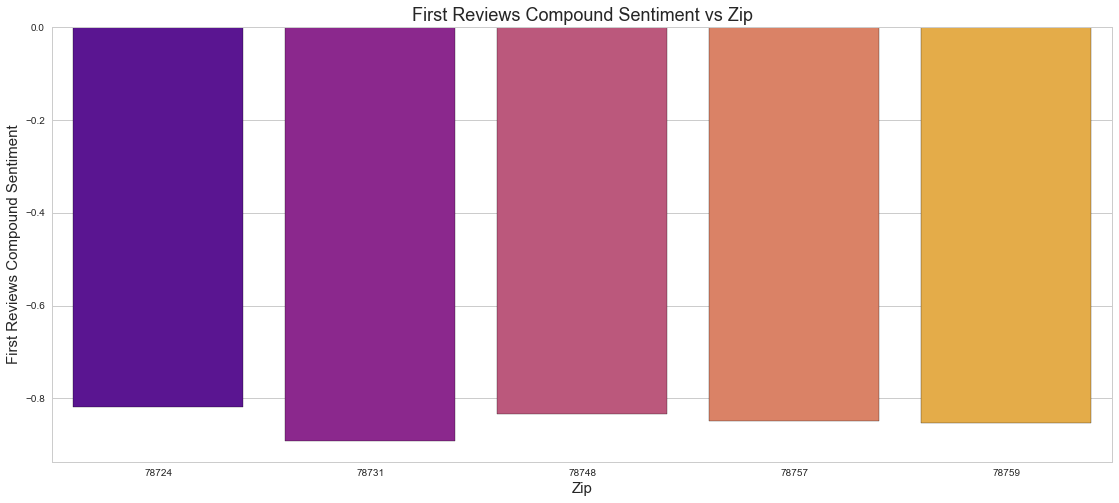

In [50]:
plt.figure(figsize=(19,8))
sns.set_style('whitegrid')
sns.barplot(df_Bottom_Compaines_Compund_Sentiment['Zip'],df_Bottom_Compaines_Compund_Sentiment['First_Review_Sentiment metric_Compound'],data=df_Bottom_Compaines_Compund_Sentiment,ci=False, palette='plasma')
plt.xlabel('Zip',fontsize=(15))
plt.rcParams["patch.force_edgecolor"] = True
plt.ylabel('First Reviews Compound Sentiment',fontsize=(15))
plt.title('First Reviews Compound Sentiment vs Zip',fontsize=(18));

In [51]:
review_number = 1

for first_review in df_Bottom_Compaines_Compund_Sentiment['First_Review']:
    print(' ')
    print('-------- ')
    print(' ')
    print('Review {}: {}'.format(review_number,first_review))
    
    review_number += 1

 
-------- 
 
Review 1: When I'm trapped at school without having packed a lunch or dinner (d'oh) it sends me into a crisis mode. Where can a girl get food around campus where the...
 
-------- 
 
Review 2: I was in an horrific accident September 20th. I was stopped in traffic on I35. And was hit from behind by a car going 65. Then our A/C went out. My husband...
 
-------- 
 
Review 3: All good Juice/Smoothies are pricey so no complaints about that! I've never had a drink I didn't enjoy here. Definitely check it out! 

I realize now by...
 
-------- 
 
Review 4: I hate the dentist. Absolutely hate them. I have extreme dental anxiety - like get out of my mouth - get away from me - don't touch me or I will scream and...
 
-------- 
 
Review 5: I have SEVERE dental anxiety, I usually cry during X-rays. I've had bad experiences in the past when I was little (accidental teeth pulling that resulted in...
 
-------- 
 
Review 6: I cannot say enough good things about this place. I came to Nex

<h3>Note: Just because the compound sentiment is negative doesn't mean the business rating will be low</h3>

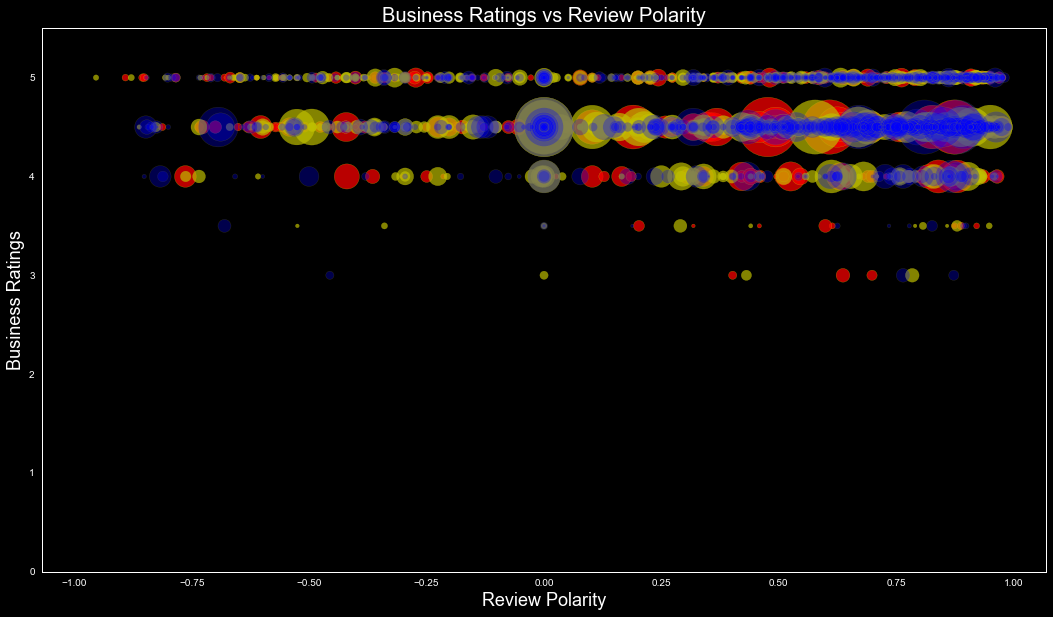

In [52]:
plt.style.use('dark_background')
plt.figure(figsize=(18,10))
plt.scatter(x=df_Yelp_API['First_Review_Sentiment metric_Compound'],y=df_Yelp_API['Business_Ratings'],label='First Review Polarity',c='r',alpha=.73,s=df_Yelp_API['Review_Counts'],edgecolors='y')
plt.scatter(x=df_Yelp_API['Second_Review_Sentiment metric_Compound'],y=df_Yelp_API['Business_Ratings'],label='First Review Polarity',c='y',alpha=.69,s=df_Yelp_API['Review_Counts']);
plt.scatter(x=df_Yelp_API['Third_Review_Sentiment metric_Compound'],y=df_Yelp_API['Business_Ratings'],label='First Review Polarity',c='b',alpha=.3,s=df_Yelp_API['Review_Counts'],edgecolors='y');
plt.title('Business Ratings vs Review Polarity',fontsize=(20));
plt.xlabel('Review Polarity',fontsize=(18))
plt.ylabel('Business Ratings',fontsize=(18))
plt.xlim(-1.07,1.07)
plt.ylim(0,5.5)
plt.grid();


<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

In [53]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [54]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review_Counts'},axis=1,inplace=True)

In [55]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [56]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()




In [57]:
df_Yelp_Sentiment_table.rename_axis({
    'First_Review_Sentiment metric_Positive'    : '%_Avg_First_Review_Sentiment_metric_Positive',
       'First_Review_Sentiment metric_Negative' :'%_Avg_First_Review_Sentiment_metric_Negative',
       'First_Review_Sentiment metric_Neutral'  : '%_Avg_First_Review_Sentiment_metric_Neutral',
       'First_Review_Sentiment metric_Compound' : '%_Avg_First_Review_Sentiment_metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive': '%_Avg_Second_Review_Sentiment_metric_Positive',
       'Second_Review_Sentiment metric_Negative': '%_Avg_Second_Review_Sentiment_metric_Negative',
       'Second_Review_Sentiment metric_Neutral' : '%_Avg_Second_Review_Sentiment_metric_Neutral',
       'Second_Review_Sentiment metric_Compound': '%_Avg_Second_Review_Sentiment_metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive' : '%_Avg_Third_Review_Sentiment_metric_Positive',
       'Third_Review_Sentiment metric_Negative' : '%_Avg_Third_Review_Sentiment_metric_Negative',
       'Third_Review_Sentiment metric_Neutral'  : '%_Avg_Third_Review_Sentiment_metric_Neutral',
       'Third_Review_Sentiment metric_Compound' : '%_Avg_Third_Review_Sentiment_metric_Compound'},axis=1,inplace=True)

In [58]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')
df_table



,Zip,Number Of Crimes,Review_Counts,%_Avg_Business_Ratings,%_Avg_First_Review_Sentiment_metric_Positive,%_Avg_First_Review_Sentiment_metric_Negative,%_Avg_First_Review_Sentiment_metric_Neutral,%_Avg_First_Review_Sentiment_metric_Compound,%_Avg_Second_Review_Sentiment_metric_Positive,%_Avg_Second_Review_Sentiment_metric_Negative,%_Avg_Second_Review_Sentiment_metric_Neutral,%_Avg_Second_Review_Sentiment_metric_Compound,%_Avg_Third_Review_Sentiment_metric_Positive,%_Avg_Third_Review_Sentiment_metric_Negative,%_Avg_Third_Review_Sentiment_metric_Neutral,%_Avg_Third_Review_Sentiment_metric_Compound
0,78610,1,431.0,4.70,0.229000,0.034400,0.736600,0.660240,0.204200,0.000000,0.795800,0.645360,0.265600,0.015200,0.719200,0.780060
1,78732,1,861.0,4.75,0.227556,0.024778,0.747611,0.583228,0.227778,0.000000,0.772222,0.629022,0.256444,0.017278,0.726333,0.645433
2,78664,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78733,2,93.0,4.88,0.020500,0.036000,0.943500,-0.019925,0.064000,0.042250,0.893750,0.033725,0.183000,0.018000,0.799000,0.578925
4,78737,3,1077.0,4.75,0.167200,0.037000,0.795700,0.346620,0.181000,0.041300,0.777700,0.466250,0.191000,0.013000,0.796000,0.612080
5,78652,6,247.0,4.88,0.344500,0.030250,0.625250,0.880975,0.000000,0.088500,0.911500,-0.363900,0.158750,0.022500,0.818750,0.379600
6,78728,6,1648.0,4.90,0.183300,0.048100,0.768550,0.461800,0.220750,0.033050,0.746050,0.573560,0.171150,0.026050,0.802700,0.487805
7,78712,7,733.0,4.42,0.215105,0.027947,0.756895,0.558005,0.229263,0.019789,0.751000,0.643000,0.167316,0.025684,0.807000,0.463489
8,78730,24,790.0,4.75,0.154125,0.025125,0.820812,0.449013,0.208750,0.028125,0.763188,0.589656,0.150000,0.030562,0.819437,0.353488
9,78653,26,470.0,4.67,0.154278,0.037167,0.808556,0.400844,0.230833,0.014333,0.754833,0.624239,0.164833,0.059667,0.775500,0.306483


In [40]:
from mpl_toolkits import mplot3d
from mpl_toolkits.basemap import Basemap

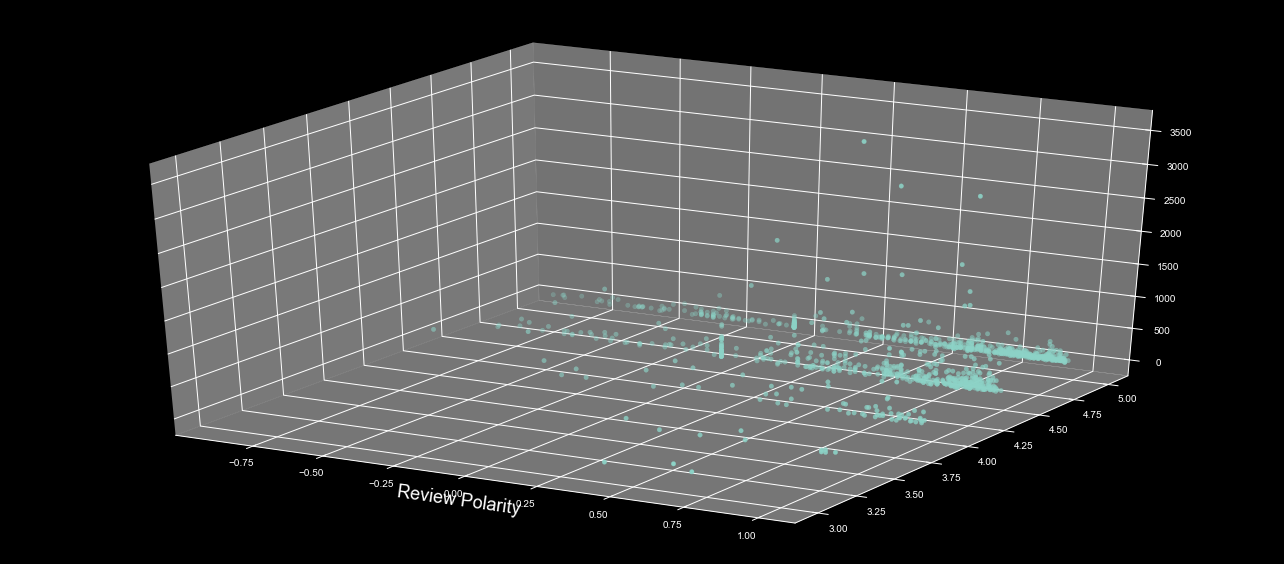

In [72]:
fig = plt.figure(figsize=(18,8))
ax =plt.axes(projection='3d')

ax.scatter3D(df_Yelp_API['First_Review_Sentiment metric_Compound'],df_Yelp_API['Business_Ratings'],df_Yelp_API['Review_Counts']);
plt.xlabel('Review Polarity',fontsize=(18));
plt.tight_layout()

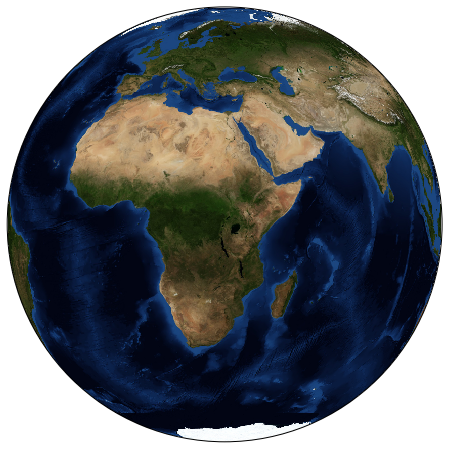

In [49]:
plt.figure(figsize=(18,8))
m = Basemap(projection='ortho',resolution=None, lat_0=0,lon_0=30)
m.bluemarble(scale=.5);

In [ ]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

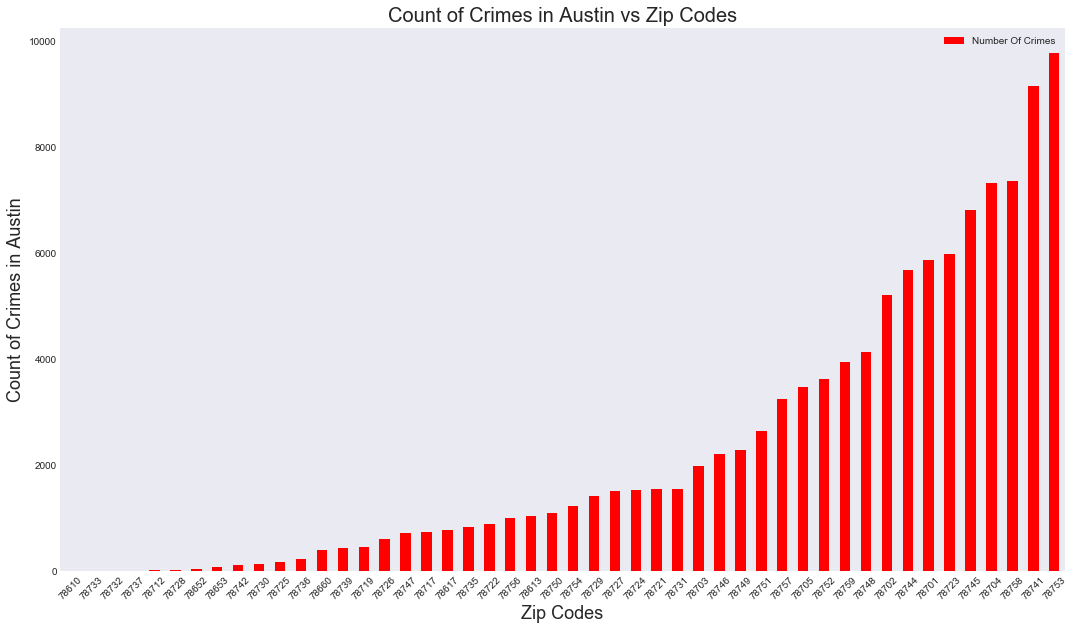

In [81]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));